# EDA

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn
seaborn.set(style='ticks')

In [2]:
cab_data = pd.read_excel('../Cab_Data.xlsx',engine='openpyxl')
#print(cab_data.isnull().values.any())
cab_data.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

In [3]:
city = pd.read_csv('../City.csv')
city.dtypes

City          object
Population    object
Users         object
dtype: object

In [4]:
customer_id = pd.read_csv('../Customer_ID.csv')
customer_id.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [5]:
transaction_ID = pd.read_csv('../Transaction_ID.csv')
transaction_ID.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [6]:
maindata = pd.merge(left=cab_data,right=transaction_ID,how='inner',left_on='Transaction ID',right_on='Transaction ID')

In [7]:
maindata = pd.merge(left=maindata,right=customer_id,how='inner',left_on='Customer ID',right_on='Customer ID')

In [8]:
maindata = pd.merge(left=maindata,right=city,how='inner',left_on='City',right_on='City')

In [9]:
maindata['Profit'] = maindata['Price Charged'] - maindata['Cost of Trip']

In [10]:
maindata.shape

(359392, 15)

<AxesSubplot:xlabel='year', ylabel='Profit'>

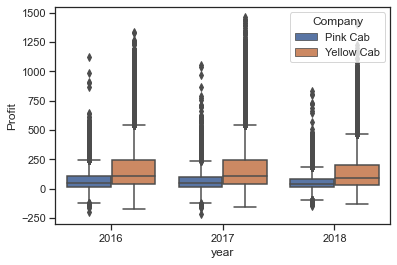

In [119]:
data_grap_10 = maindata
data_grap_10['year'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).year
data_grap_10['month'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).month
data_grap_10['%profit'] = data_grap_10['Profit'] * 100 / data_grap_10['Cost of Trip']
seaborn.boxplot(x="year", y="Profit", data=data_grap_10, hue="Company")


<AxesSubplot:xlabel='year', ylabel='KM Travelled'>

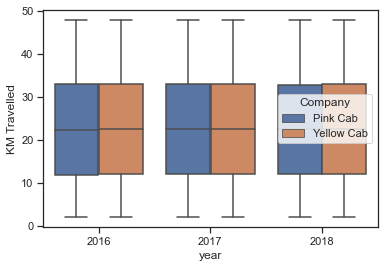

In [120]:
data_grap_10 = maindata
data_grap_10['year'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).year
data_grap_10['month'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).month
data_grap_10['%profit'] = data_grap_10['Profit'] * 100 / data_grap_10['Cost of Trip']
seaborn.boxplot(x="year", y="KM Travelled", data=data_grap_10, hue="Company")

<AxesSubplot:xlabel='year', ylabel='Age'>

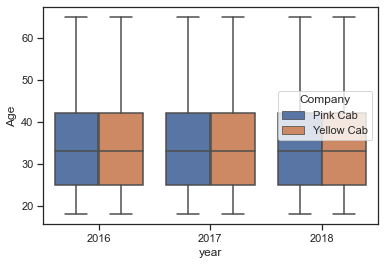

In [122]:
data_grap_10 = maindata
data_grap_10['year'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).year
data_grap_10['month'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).month
data_grap_10['%profit'] = data_grap_10['Profit'] * 100 / data_grap_10['Cost of Trip']
seaborn.boxplot(x="year", y="Age", data=data_grap_10, hue="Company")

## City Analysis

### Number of trips by city

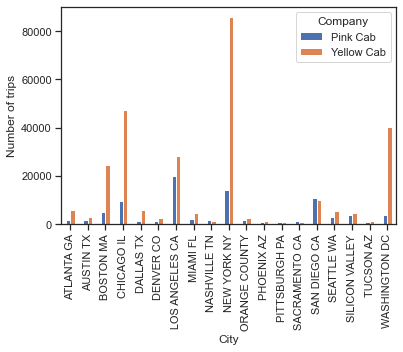

In [12]:
pd.crosstab(maindata.City,maindata.Company).plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of trips')
plt.xticks()
plt.show()

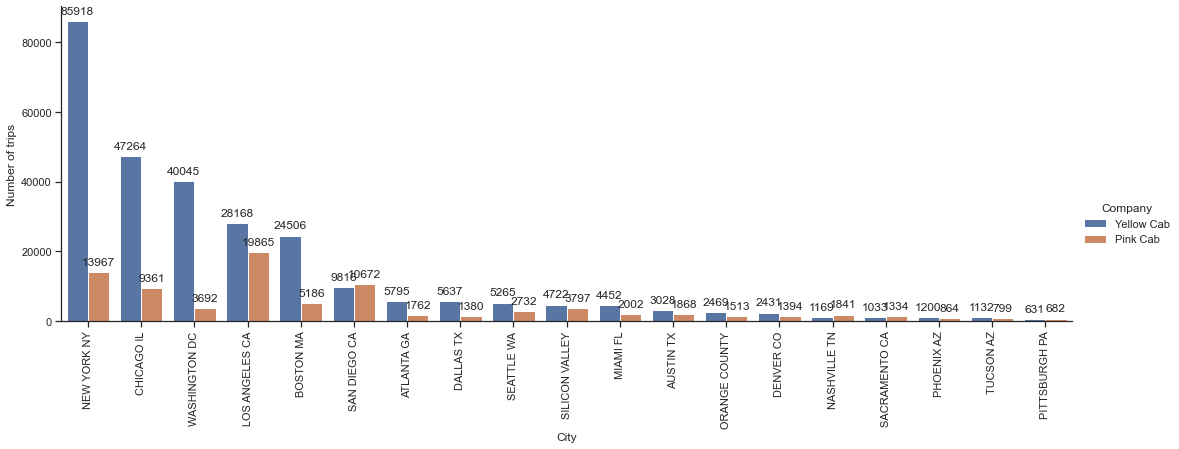

In [33]:
data_grap_10 = maindata
data_grap_10['year'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).year
data_grap_10['month'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).month
data_grap_10['%profit'] = data_grap_10['Profit'] * 100 / data_grap_10['Cost of Trip']

data20 = data_grap_10.groupby(['City','Company'],as_index=False).count()
data20 = data20.sort_values(['Age'], ascending=False)

fg = seaborn.catplot(x='City', y='Age', hue='Company', data=data20, kind='bar',aspect=3)
fg.set_ylabels('Number of trips')
fg.set_xticklabels(rotation=90)
for ax in fg.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Profit percentage by city

<Figure size 432x288 with 0 Axes>

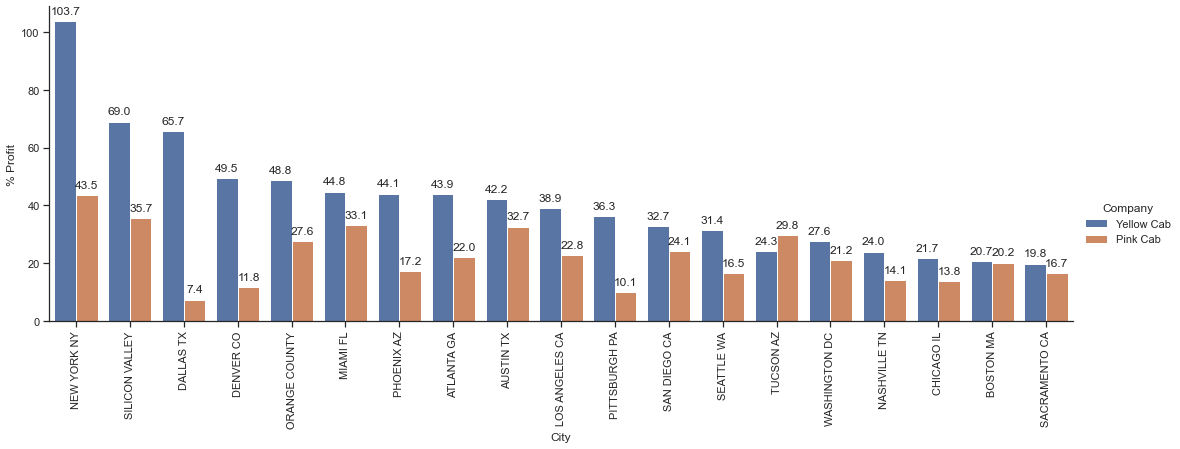

In [47]:
data_grap_1 = maindata
data_grap_1['year'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).year
data_grap_1['month'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).month
plt.figure()
data_lop = data_grap_1.groupby(['City','Company'],as_index=False).sum()
data_lop['Percentage'] = data_lop['Profit'] * 100 / data_lop['Cost of Trip']
data_lop = data_lop.sort_values(['Percentage'], ascending=False)
#data_lop['Percentage'].unstack().plot(kind="bar")
#plt.ylabel('Profit %')
fg = seaborn.catplot(x='City', y='Percentage', hue='Company', 
                         data=data_lop, kind='bar',aspect=3)
fg.set_xlabels('City')
fg.set_ylabels('% Profit')
fg.set_xticklabels(rotation=90)
for ax in fg.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### City Cab Users Covered By Company

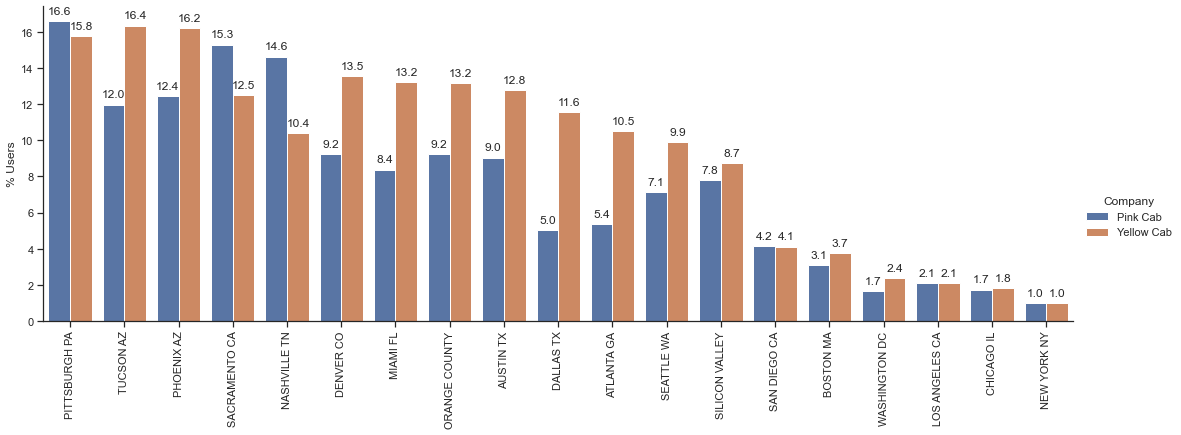

In [75]:
data_grap_10 = maindata
data_grap_10['year'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).year
data_grap_10['month'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).month
data_grap_10['%profit'] = data_grap_10['Profit'] * 100 / data_grap_10['Cost of Trip']

data_user = data_grap_10.drop_duplicates(['City', 'Users','Company']).reset_index()[['Company','City','Users']]
data_user = data_user.rename(columns={'City':'City1','Company':'Company1'})
data20 = data_grap_10.groupby(['City','Company','Customer ID'],as_index=False).count()
data20 = data20.groupby(['City','Company'],as_index=False).count()[['Company','City','Age']]
data30 = pd.concat([data_user, data20],axis=1)
data30["Age"] = (data30["Age"]).astype(float)
data30["Users"] = (data30["Users"].replace(',','', regex=True)).astype(float)
data30['porc_usuarios'] = data30['Age'] / data30['Users'] * 100
data30
data30 = data30.sort_values(by=['porc_usuarios'],ascending=False)
data30

fg = seaborn.catplot(x='City', y='porc_usuarios', hue='Company', data=data30, kind='bar',aspect=3)
fg.set_xlabels('')
fg.set_ylabels('% Users')
fg.set_xticklabels(rotation=90)
for ax in fg.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Customer Presence of Yelow and Pink Cab city wise

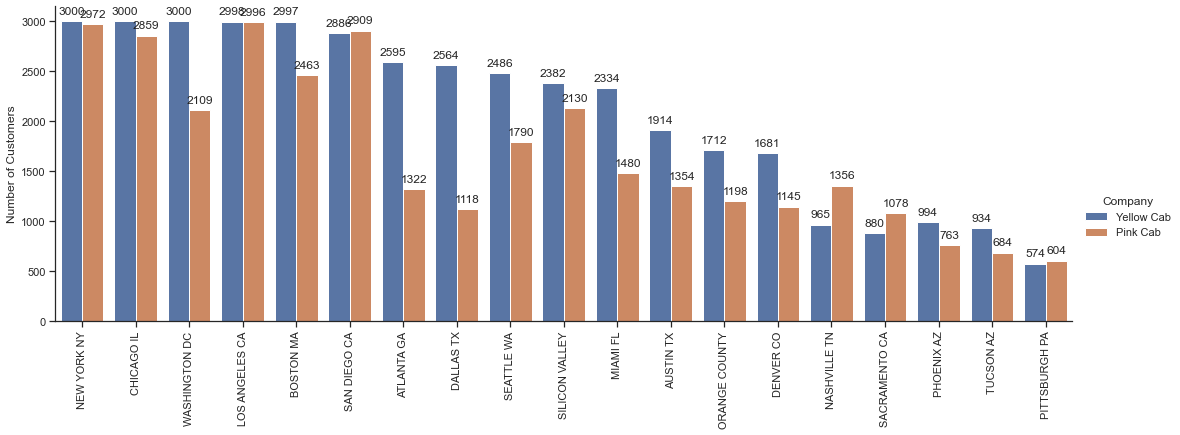

In [81]:
data_grap_10 = maindata
data_grap_10['year'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).year
data_grap_10['month'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).month
data_grap_10['%profit'] = data_grap_10['Profit'] * 100 / data_grap_10['Cost of Trip']

data20 = data_grap_10.groupby(['City','Company','Customer ID'],as_index=False).count()
data20 = data20.groupby(['City','Company'],as_index=False).count()[['Company','City','Users']]

data20 = data20.sort_values(by=['Users'],ascending=False)
data20

fg = seaborn.catplot(x='City', y='Users', hue='Company', data=data20, kind='bar', aspect=3)
fg.set_xlabels('')
fg.set_ylabels('Number of Customers')
fg.set_xticklabels(rotation=90)
for ax in fg.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Payment Method Analysis

### Number of trips for payment mode

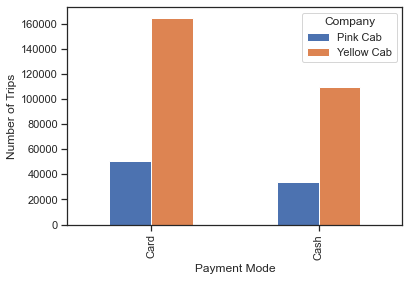

In [12]:
pd.crosstab(maindata.Payment_Mode,maindata.Company).plot(kind='bar')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Trips')
plt.xticks()
plt.show()

### number of trips for year and payment mode

<AxesSubplot:xlabel='year,Payment_Mode'>

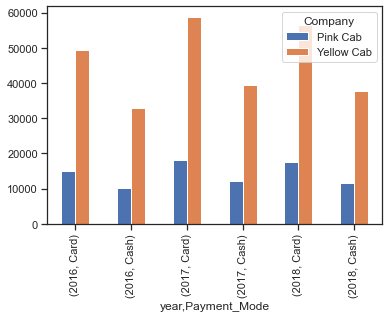

In [13]:
data_grap_1 = maindata
data_grap_1['year'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).year
data_grap_1['month'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).month
pd.crosstab([data_grap_1.year,data_grap_1.Payment_Mode],data_grap_1.Company).plot(kind='bar')

<AxesSubplot:xlabel='year,Payment_Mode'>

<Figure size 432x288 with 0 Axes>

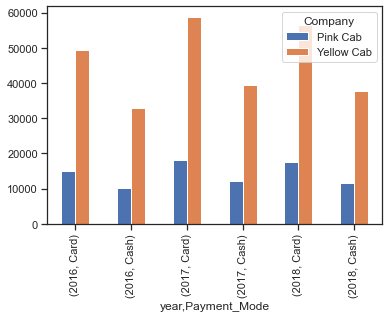

In [14]:
data_grap_1 = maindata
data_grap_1['year'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).year
data_grap_1['month'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).month
plt.figure()
data_grap_1.groupby(['year','Payment_Mode','Company'])['City'].count().unstack().plot(kind="bar")

C:\Users\gejov\.conda\envs\dataglacier\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 432x288 with 0 Axes>

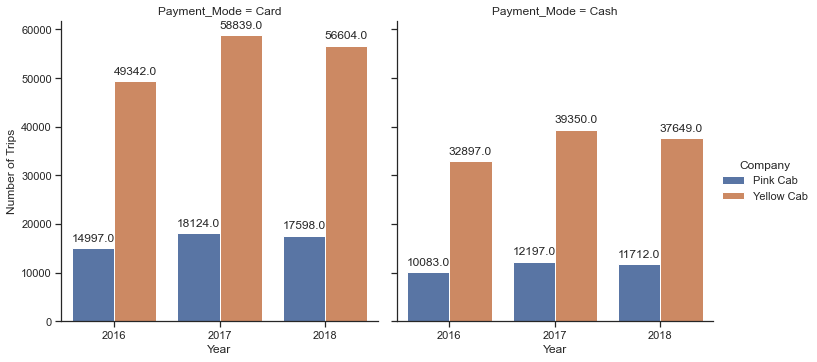

In [34]:
data_grap_1 = maindata
data_grap_1['year'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).year
data_grap_1['month'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).month
plt.figure()
data2 = data_grap_1.groupby(['year','Payment_Mode','Company'])['City'].count().reset_index()

fg = seaborn.factorplot(x='year', y='City', hue='Company', 
                        col='Payment_Mode', data=data2, kind='bar')
fg.set_xlabels('Year')
fg.set_ylabels('Number of Trips')
for ax in fg.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Average profit by payment method

C:\Users\gejov\.conda\envs\dataglacier\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 432x288 with 0 Axes>

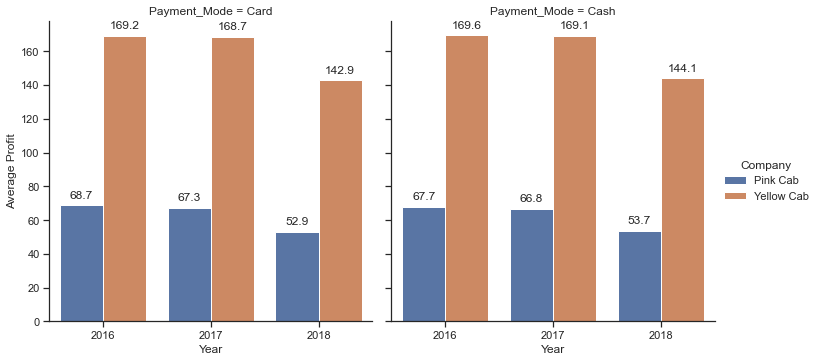

In [126]:
data_grap_1 = maindata
data_grap_1['year'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).year
data_grap_1['month'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).month
plt.figure()
data2 = data_grap_1.groupby(['year','Payment_Mode','Company']).mean().reset_index()

fg = seaborn.factorplot(x='year', y='Profit', hue='Company', 
                        col='Payment_Mode', data=data2, kind='bar')
fg.set_xlabels('Year')
fg.set_ylabels('Average Profit')
for ax in fg.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Seasonality Analysis

### Profit % Average

Text(0, 0.5, '% Profit')

<Figure size 432x288 with 0 Axes>

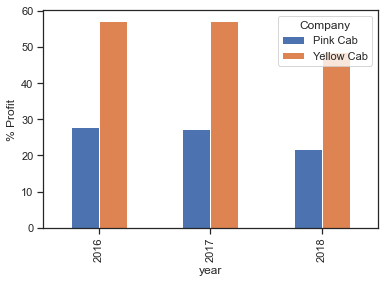

In [36]:
data_grap_1 = maindata
data_grap_1['year'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).year
data_grap_1['month'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).month
data_grap_1['%profit'] = data_grap_1['Profit'] * 100 / data_grap_1['Cost of Trip']
plt.figure()
data_lop = data_grap_1.groupby(['year','Company'])['%profit'].mean().unstack().plot(kind="bar")
#data_lop['Percentage'] = data_lop['Profit'] * 100 / data_lop['Cost of Trip']
#data_lop['Percentage'].unstack().plot(kind="bar")
plt.ylabel('% Profit')

### Yearly Profit Analysis

<Figure size 432x288 with 0 Axes>

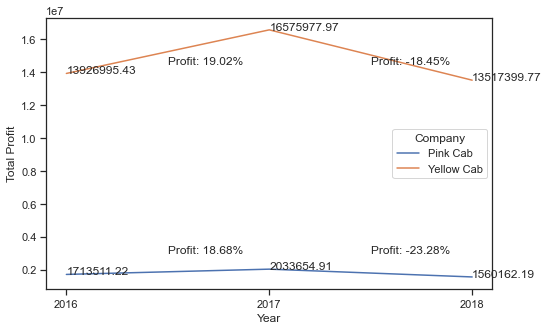

In [17]:
data_grap_1 = maindata
data_grap_1['year'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).year
data_grap_1['month'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).month
plt.figure()
data_grap_1.groupby(['year','Company'])['Profit'].sum().unstack().plot(figsize=(8,5))
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.xticks([2016,2017,2018])

data_points = data_grap_1.groupby(['year','Company']).sum().iloc[:,7].tolist()
years = data_grap_1.groupby(['year','Company']).sum().index.tolist()
for i in range(len(data_points)):
    plt.annotate("{:.2f}".format(data_points[i]),(years[i][0],data_points[i]))
    
index_profit = [0,1,2,3]
axisx_profit = [2016.5,2016.5,2017.5,2017.5]
axisy_profit = [3000000,14500000,3000000,14500000]
for i in index_profit:
    profit1 = (data_points[i+2]-data_points[i]) * 100 / data_points[i]
    plt.annotate("Profit: {:.2f}%".format(profit1), (axisx_profit[i], axisy_profit[i]))
plt.show()

### Number of trips by Year

C:\Users\gejov\.conda\envs\dataglacier\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


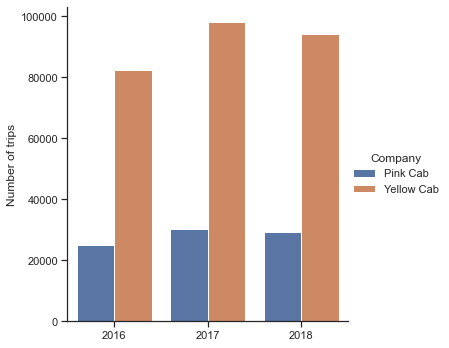

In [82]:
data_grap_10 = maindata
data_grap_10['year'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).year
data_grap_10['month'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).month
data_grap_10['%profit'] = data_grap_10['Profit'] * 100 / data_grap_10['Cost of Trip']

data_user = data_grap_10['Users'].unique()
data20 = data_grap_10.groupby(['year','Company'],as_index=True).count()
data20


data3 = data20.reset_index()
data3
fg = seaborn.factorplot(x='year', y='City', hue='Company', data=data3, kind='bar')
fg.set_xlabels('')
fg.set_ylabels('Number of trips')

### Quarterly profit analysis

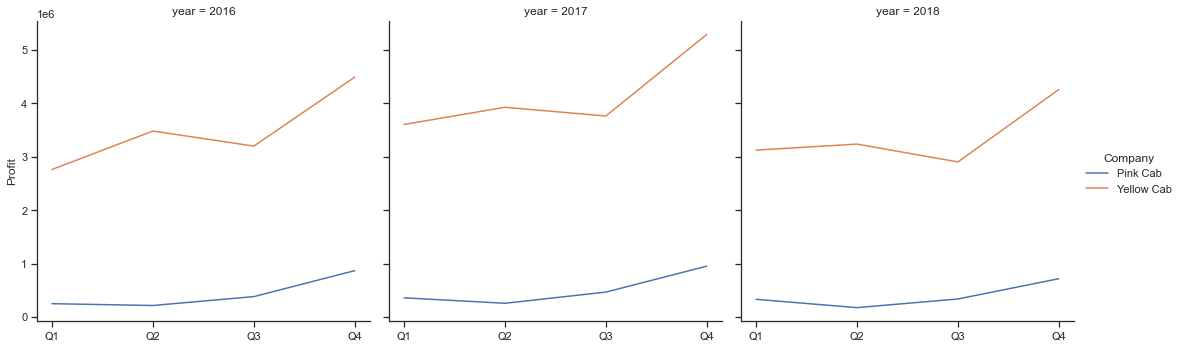

In [165]:
data_grap_10 = maindata
data_grap_10['year'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).year
data_grap_10['month'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).month
data_grap_10['day'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).day
data_grap_10['%profit'] = data_grap_10['Profit'] * 100 / data_grap_10['Cost of Trip']

data20 = data_grap_10.groupby(['year','Company','month'],as_index=False).sum()
data30 = data20.groupby(['year','Company',pd.cut(data20["month"], np.array([0,3,6,9,13]))],as_index=True).sum()
data30 = data30.rename(columns={'month':'month1'})
data30 = data30.reset_index()
data30["month"] = (data30["month"]).astype(str)
data30.month.replace({'(0, 3]':'Q1', '(3, 6]':'Q2', '(6, 9]':'Q3','(9, 13]':'Q4'}, inplace=True)


fg = seaborn.relplot(x='month', y='Profit', hue='Company', col='year' ,data=data30,kind="line")
fg.set_xlabels('')



### Customer Analysis by day

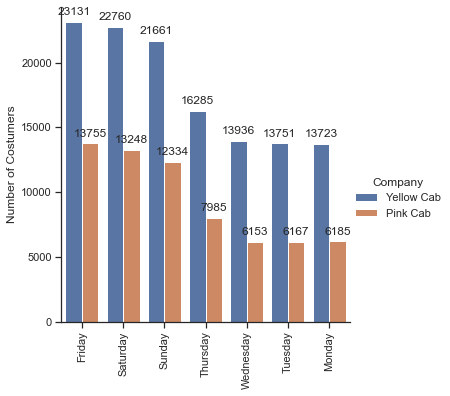

In [87]:
data_grap_10 = maindata
data_grap_10['year'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).year
data_grap_10['month'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).month
data_grap_10['dayweek'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).dayofweek
data_grap_10['%profit'] = data_grap_10['Profit'] * 100 / data_grap_10['Cost of Trip']


data20 = data_grap_10.groupby(['dayweek','Company','Customer ID'],as_index=False).count()
data20 = data20.groupby(['dayweek','Company'],as_index=False).count()
data20.dayweek.replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)

data20 = data20.sort_values(by=['Customer ID'],ascending=False)
data20
fg = seaborn.catplot(x='dayweek', y='Customer ID', hue='Company', data=data20, kind='bar')
fg.set_xlabels('')
fg.set_ylabels('Number of Costumers')
fg.set_xticklabels(rotation=90)
for ax in fg.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Rides analysis by day

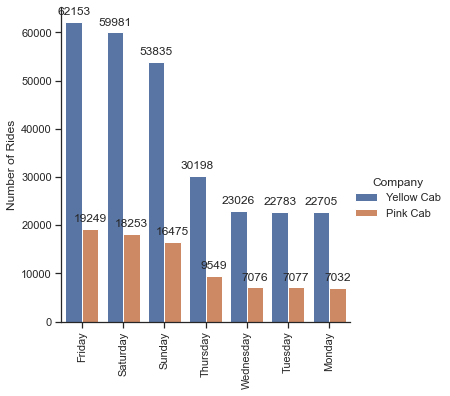

In [88]:
data_grap_10 = maindata
data_grap_10['year'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).year
data_grap_10['month'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).month
data_grap_10['dayweek'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).dayofweek
data_grap_10['%profit'] = data_grap_10['Profit'] * 100 / data_grap_10['Cost of Trip']


data20 = data_grap_10.groupby(['dayweek','Company'],as_index=False).count()
data20.dayweek.replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)

data20 = data20.sort_values(by=['Customer ID'],ascending=False)
data20
fg = seaborn.catplot(x='dayweek', y='Customer ID', hue='Company', data=data20, kind='bar')
fg.set_xlabels('')
fg.set_ylabels('Number of Rides')
fg.set_xticklabels(rotation=90)
for ax in fg.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Demand by day

Text(0, 0.5, 'Number of Rides')

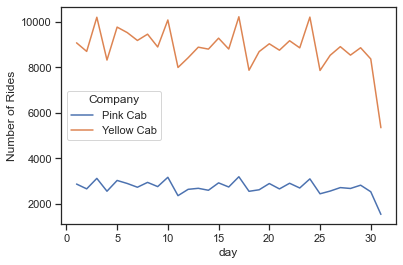

In [86]:
data_grap_10 = maindata
data_grap_10['year'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).year
data_grap_10['month'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).month
data_grap_10['day'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).day
data_grap_10['%profit'] = data_grap_10['Profit'] * 100 / data_grap_10['Cost of Trip']

data20 = data_grap_10.groupby(['Company','day'],as_index=False).count()

#data20 = data20.sort_values(by=['Users'],ascending=False)
data20

fg = seaborn.lineplot(x='day', y='City', hue='Company', data=data20)
fg.set_ylabel("Number of Rides")

#for ax in fg.axes.ravel():
#    for p in ax.patches:
#        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Income Analysis

### Number of Costumers by Income

C:\Users\gejov\.conda\envs\dataglacier\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


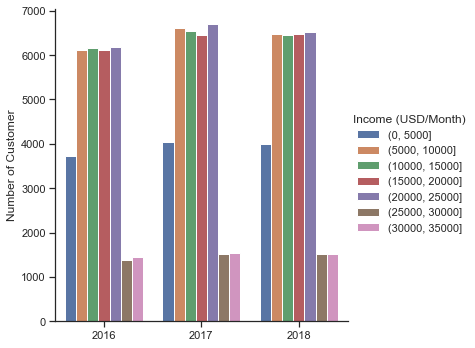

In [143]:
data_grap_1 = maindata
data_grap_1['year'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).year
data_grap_1['month'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).month
data_grap_1['%profit'] = data_grap_1['Profit'] * 100 / data_grap_1['Cost of Trip']

#data_p = data_grap_1.groupby(['year','Company']).mean()
data3 = data_grap_1.groupby([pd.cut(data_grap_1["Income (USD/Month)"], np.arange(0, 35001, 5000)),'year','Customer ID']).count()
data3 = data3.rename(columns={'Income (USD/Month)':'Income (USD/Month)1'})
data3 = data3.reset_index()
data3 = data3.dropna(subset=['City'])
data3 = data3.groupby(['year',"Income (USD/Month)"], as_index=False).count()
data3


fg = seaborn.factorplot(x='year', y='Customer ID', hue='Income (USD/Month)', data=data3, kind='bar')
fg.set_xlabels('')
fg.set_ylabels('Number of Customer')


### Profit analysis by income

C:\Users\gejov\.conda\envs\dataglacier\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


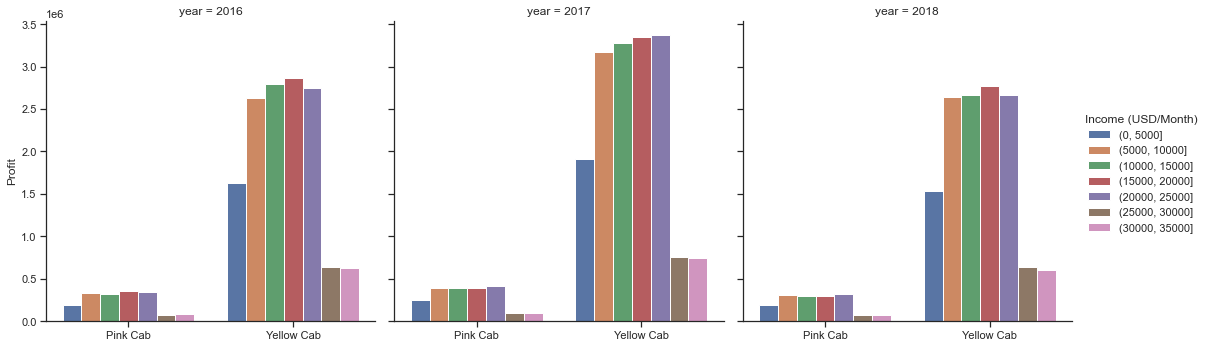

In [26]:
data_grap_1 = maindata
data_grap_1['year'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).year
data_grap_1['month'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).month
data_grap_1['%profit'] = data_grap_1['Profit'] * 100 / data_grap_1['Cost of Trip']

#data_p = data_grap_1.groupby(['year','Company']).mean()
data3 = data_grap_1.groupby([pd.cut(data_grap_1["Income (USD/Month)"], np.arange(0, 35001, 5000)),'Company','year']).sum()
data3 = data3.rename(columns={'Income (USD/Month)':'Income (USD/Month)1'})
data3 = data3.reset_index()
data3



fg = seaborn.factorplot(x='Company', y='Profit', hue='Income (USD/Month)', col='year', data=data3, kind='bar')
fg.set_xlabels('')

### Number of trips by income

C:\Users\gejov\.conda\envs\dataglacier\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


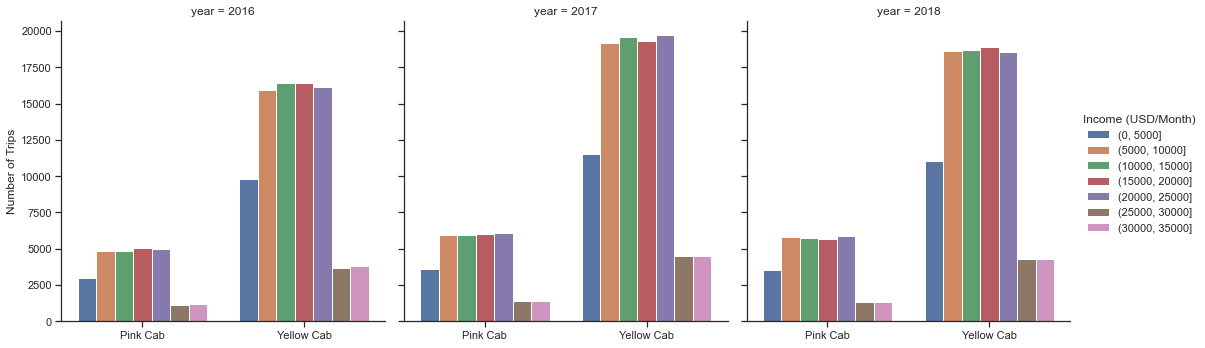

In [130]:
data_grap_1 = maindata
data_grap_1['year'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).year
data_grap_1['month'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).month
data_grap_1['%profit'] = data_grap_1['Profit'] * 100 / data_grap_1['Cost of Trip']

#data_p = data_grap_1.groupby(['year','Company']).mean()
data3 = data_grap_1.groupby([pd.cut(data_grap_1["Income (USD/Month)"], np.arange(0, 35001, 5000)),'Company','year']).count()
data3 = data3.rename(columns={'Income (USD/Month)':'Income (USD/Month)1'})
data3 = data3.reset_index()
data3



fg = seaborn.factorplot(x='Company', y='Profit', hue='Income (USD/Month)', col='year', data=data3, kind='bar')
fg.set_xlabels('')
fg.set_ylabels('Number of Trips')


## Customer retention analysis

### Customer retention (at least 5 rides)

C:\Users\gejov\.conda\envs\dataglacier\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


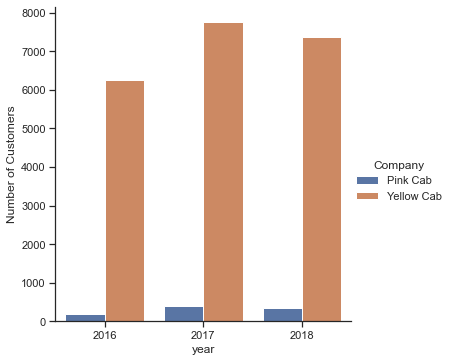

In [43]:
data_grap_10 = maindata
data_grap_10['year'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).year
data_grap_10['month'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).month
data_grap_10['%profit'] = data_grap_10['Profit'] * 100 / data_grap_10['Cost of Trip']

#dups_color_and_shape = data_grap_10.pivot_table(index=['year','Company','Customer ID'], aggfunc='size')
#dups_color_and_shape

data20 = data_grap_10.groupby(['year','Company','Customer ID'],as_index=False).size()
data20

data3 = data20.groupby(['year','Company',pd.cut(data20["size"], np.array([4,26]))],as_index=False).count()
#data3 = data3.rename(columns={'Age':'Age1'})
#data3 = data3.reset_index()
data3

fg = seaborn.factorplot(x='year', y='size', hue='Company', data=data3, kind='bar')
fg.set_ylabels('Number of Customers')

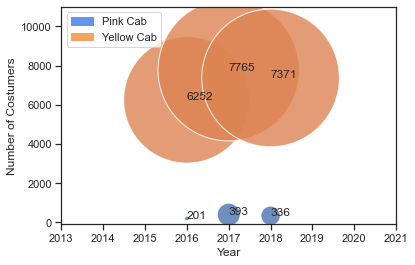

In [60]:
#ss = seaborn.scatterplot(
#    data=data3, x="year", y="size", hue="Company", size="size",
#    sizes=(20, 20000), legend='auto',alpha=.8)
#ss.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)


fig, ax = plt.subplots()
seaborn.scatterplot(
   data=data3, x="year", y="size", hue="Company", size="size",
   sizes=(20, 20000), legend=False,alpha=.8)
ax.set_xlim(2013,2021)
ax.set_ylim(-100,11000)
red_patch = mpatches.Patch(color='cornflowerblue', label='Pink Cab')
orange_patch = mpatches.Patch(color='sandybrown', label='Yellow Cab')
ax.legend(handles=[red_patch,orange_patch],loc="upper left")
ax.set_xlabel('Year')
ax.set_ylabel('Number of Costumers')

for i in range(data3.shape[0]):
    plt.annotate("{:.0f}".format(data3['size'][i]), (data3['year'][i], data3['size'][i]))
plt.show()

In [53]:
data3.shape[0]

6

### Customer retention (at least 10 rides)

C:\Users\gejov\.conda\envs\dataglacier\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


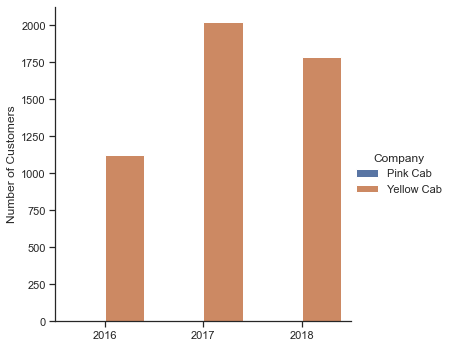

In [61]:
data_grap_10 = maindata
data_grap_10['year'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).year
data_grap_10['month'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).month
data_grap_10['%profit'] = data_grap_10['Profit'] * 100 / data_grap_10['Cost of Trip']

#dups_color_and_shape = data_grap_10.pivot_table(index=['year','Company','Customer ID'], aggfunc='size')
#dups_color_and_55s5555

data20 = data_grap_10.groupby(['year','Company','Customer ID'],as_index=False).size()
data20.describe()

data3 = data20.groupby(['year','Company',pd.cut(data20["size"], np.array([9,26]))],as_index=False).count()
#data3 = data3.rename(columns={'Age':'Age1'})
#data3 = data3.reset_index()
fg = seaborn.factorplot(x='year', y='size', hue='Company', data=data3, kind='bar')
fg.set_xlabels('')
fg.set_ylabels('Number of Customers')

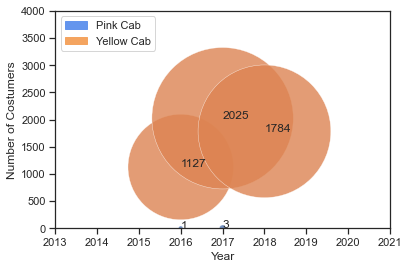

In [67]:
#seaborn.lmplot(x="year", y="size", data=data3, hue="Company",size='size', fit_reg=False, legend=False)
#seaborn.scatterplot(
#    data=data3, x="year", y="size", hue="Company", size="size",
#    sizes=(20, 20000), legend=False
#)


fig, ax = plt.subplots()
seaborn.scatterplot(
   data=data3, x="year", y="size", hue="Company", size="size",
   sizes=(20, 20000), legend=False,alpha=.8)
ax.set_xlim(2013,2021)
ax.set_ylim(0,4000)
red_patch = mpatches.Patch(color='cornflowerblue', label='Pink Cab')
orange_patch = mpatches.Patch(color='sandybrown', label='Yellow Cab')
ax.legend(handles=[red_patch,orange_patch],loc="upper left")
ax.set_xlabel('Year')
ax.set_ylabel('Number of Costumers')

for i in range(data3.shape[0]):
    plt.annotate("{:.0f}".format(data3['size'][i]), (data3['year'][i], data3['size'][i]))
plt.show()

## Ride distance analysis

### Number rides vs Range of KM

C:\Users\gejov\.conda\envs\dataglacier\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


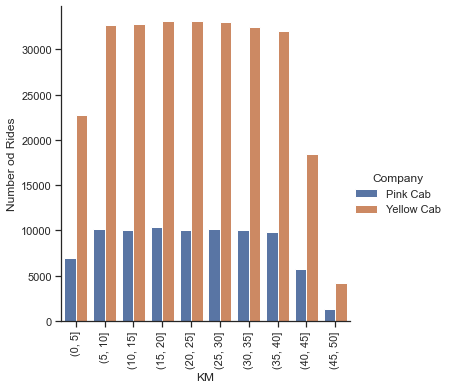

In [90]:
data_grap_10 = maindata
data_grap_10['year'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).year
data_grap_10['month'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).month
data_grap_10['%profit'] = data_grap_10['Profit'] * 100 / data_grap_10['Cost of Trip']

#data_p = data_grap_1.groupby(['year','Company']).mean()
data3 = data_grap_10.groupby(['Company',pd.cut(data_grap_10["KM Travelled"], np.arange(0, 51, 5))]).count()
data3 = data3.rename(columns={'KM Travelled':'KM Travelled1'})
data3 = data3.reset_index()
data3




fg = seaborn.factorplot(x='KM Travelled', y='KM Travelled1', hue='Company', data=data3, kind='bar')
fg.set_xlabels('KM')
fg.set_ylabels('Number od Rides')
fg.set_xticklabels(rotation=90)
    
#for ax in fg.axes.ravel():
#    for p in ax.patches:
#        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Number of customer by range of KM

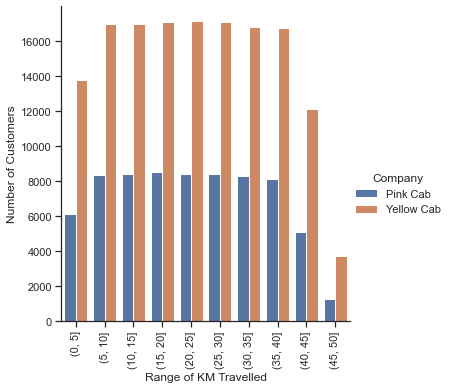

In [92]:
data_grap_10 = maindata
data_grap_10['year'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).year
data_grap_10['month'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).month
data_grap_10['%profit'] = data_grap_10['Profit'] * 100 / data_grap_10['Cost of Trip']

#data_p = data_grap_1.groupby(['year','Company']).mean()
data3 = data_grap_10.groupby(['Company',pd.cut(data_grap_10["KM Travelled"], np.arange(0, 51, 5)),'Customer ID']).count()
data3 = data3.rename(columns={'KM Travelled':'KM Travelled1'})
data3 = data3.dropna(subset=['City'])
data3 = data3.reset_index()
data3 = data3.groupby(['Company','KM Travelled'],as_index=False).count()
data3



fg = seaborn.catplot(x='KM Travelled', y='KM Travelled1', hue='Company', data=data3, kind='bar')
fg.set_xlabels('Range of KM Travelled')
fg.set_ylabels('Number of Customers')
fg.set_xticklabels(rotation=90)
    
#for ax in fg.axes.ravel():
#    for p in ax.patches:
#        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Average Profit Per KM by year

Text(0, 0.5, 'Average Profit per KM')

<Figure size 432x288 with 0 Axes>

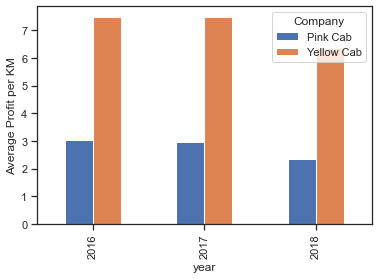

In [35]:
data_grap_1 = maindata
data_grap_1['year'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).year
data_grap_1['month'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).month
data_grap_1['profitkm'] = data_grap_1['Profit'] / data_grap_1['KM Travelled']
#data_grap_1.head()
plt.figure()
data_grap_1.groupby(['year','Company'])['profitkm'].mean().unstack().plot(kind="bar")
plt.ylabel('Average Profit per KM')

## Age analysis

### Profit by Agegroup

C:\Users\gejov\.conda\envs\dataglacier\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


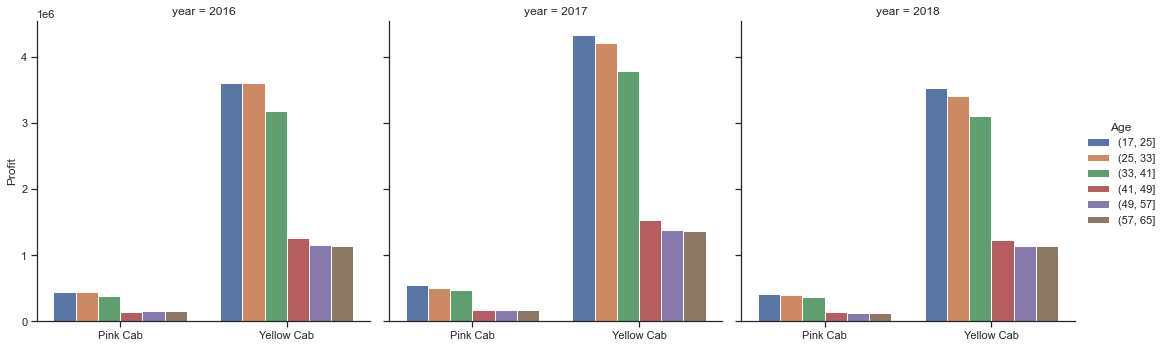

In [61]:
data_grap_1 = maindata
data_grap_1['year'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).year
data_grap_1['month'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).month
data_grap_1['%profit'] = data_grap_1['Profit'] * 100 / data_grap_1['Cost of Trip']

#data_p = data_grap_1.groupby(['year','Company']).mean()
data3 = data_grap_1.groupby([pd.cut(data_grap_1["Age"], np.arange(17, 66, 8)),'Company','year']).sum()
data3 = data3.rename(columns={'Age':'Age1'})
data3 = data3.reset_index()
data3



fg = seaborn.factorplot(x='Company', y='Profit', hue='Age', col='year', data=data3, kind='bar')
fg.set_xlabels('')


### Customer percentage by age

C:\Users\gejov\.conda\envs\dataglacier\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


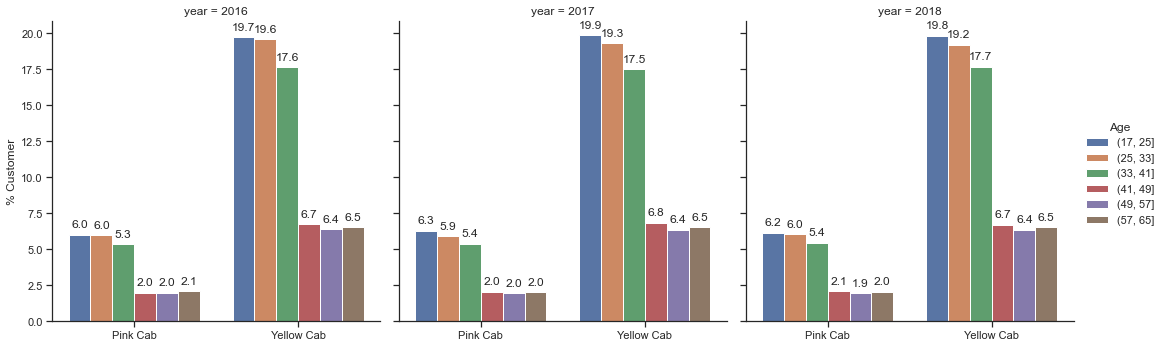

In [62]:
data_grap_10 = maindata
data_grap_10['year'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).year
data_grap_10['month'] = pd.DatetimeIndex(data_grap_10['Date of Travel']).month
data_grap_10['%profit'] = data_grap_10['Profit'] * 100 / data_grap_10['Cost of Trip']

#data_p = data_grap_1.groupby(['year','Company']).mean()
data3 = data_grap_10.groupby(['year',pd.cut(data_grap_10["Age"], np.arange(17, 66, 8)),'Company']).count()
data3 = data3.rename(columns={'Age':'Age1'})
data3 = data3.reset_index()
data3

data4 = data3.groupby(['year']).sum()
data4

data3.loc[data3['year'] == 2016, 'sum_year'] = 107319
data3.loc[data3['year'] == 2017, 'sum_year'] = 128510
data3.loc[data3['year'] == 2018, 'sum_year'] = 123563
data3['por_customer'] = (data3['Customer ID'] / data3['sum_year']) * 100
data3


fg = seaborn.factorplot(x='Company', y='por_customer', hue='Age', col='year', data=data3, kind='bar')
fg.set_xlabels('')
fg.set_ylabels('% Customer')

    
for ax in fg.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

## Gender Analysis

### Gender contribution in profit

C:\Users\gejov\.conda\envs\dataglacier\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


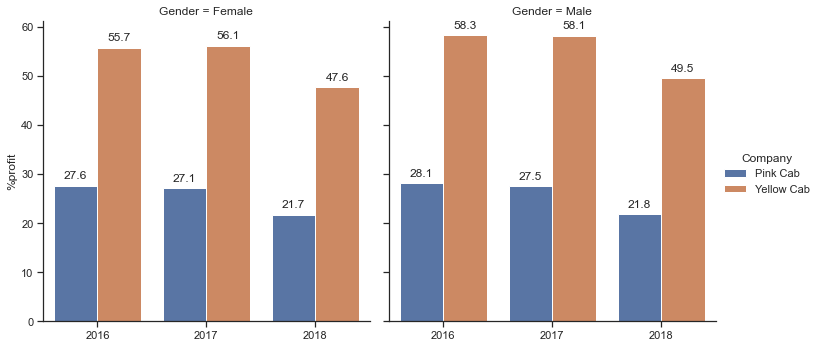

In [49]:
data_grap_1 = maindata
data_grap_1['year'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).year
data_grap_1['month'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).month
data_grap_1['%profit'] = data_grap_1['Profit'] * 100 / data_grap_1['Cost of Trip']

data_lop = data_grap_1.groupby(['year','Gender','Company']).mean().reset_index()

fg = seaborn.factorplot(x='year', y='%profit', hue='Company', 
                        col='Gender', data=data_lop, kind='bar')
fg.set_xlabels('')
for ax in fg.axes.ravel():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Recommendation

#### City reach:

Yellow cap has higher trips and customers reach in each city. In addition, Pink cap only has a city where they
have a better profit and that city is Tucson.

#### Payment method reach:

Clearly Yellow Cap has higher trips and average profit is better compared with Pink Cap, but both
have the same pattern, improve in the numbers of trips and loss in the profit according the payment method.

#### Season reach:

There is a pattern on the days of the month, It’s that every 7 days there is an increase in the numbers of
trips and that day is the Friday day. It is in both companies.

#### Income reach:

There is a better contribution from customer with incomes between $ 5000 and $ 25000. But it’s evident
that the Yellow cap has higher contributions.

#### Customer retention:

Two groups have been analyzed: at least 5 trips and at least 10 trips in each company. The
conclusion is that the Yellow Cap has more costumers in these segments.

#### Ride distance reach

There is more rides and customers between 6 KM and 40 KM, also the distribution in this range is uniform. This pattern is in both companies.

#### Age reach

There is a high profit in costumers between 17 and 41 years old, also the same trend is in the percentage of customers with the difference that there is a better contribution on Yellow Company.

### Based on these conclusions, it is suggested to invest in the Yellow Cap Company.

## General Data

In [20]:
data_grap_1 = maindata
data_grap_1['year'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).year
data_grap_1['month'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).month
data_grap_1.groupby(['Company'])['Profit'].mean()

Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Profit, dtype: float64

In [21]:
data_grap_1 = maindata
data_grap_1['year'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).year
data_grap_1['month'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).month
data_grap_1.groupby(['Company'])['Profit'].sum()

Company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: Profit, dtype: float64

In [22]:
data_grap_1 = maindata
data_grap_1['year'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).year
data_grap_1['month'] = pd.DatetimeIndex(data_grap_1['Date of Travel']).month
data_grap_1.groupby(['Company']).count()

,Transaction ID,Date of Travel,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,year,month,meanprofitkm,%profit
Company,,,,,,,,,,,,,,,,,,
Pink Cab,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711
Yellow Cab,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681


In [25]:
maindata.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Profit,year,month,meanprofitkm,%profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,137.253198,2017.045199,7.500434,6.083579,47.523115
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,160.311840,0.800239,3.445095,5.543493,42.571507
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,-220.060000,2016.000000,1.000000,-4.998235,-40.933780
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,28.012000,2016.000000,5.000000,2.000385,16.084529
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,81.962000,2017.000000,8.000000,4.466809,35.925527
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,190.030000,2018.000000,10.000000,9.170006,71.268038
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,1463.966000,2018.000000,12.000000,41.115556,320.214607


## MODEL

In [15]:
maindata.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,137.253198
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,160.311840
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,-220.060000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,28.012000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,81.962000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,190.030000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,1463.966000


In [46]:
maindata

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,year,month,day
0,10000011,2016-01-08,LabelEncoder(),ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",57.3150,2016,1,8
1,10351127,2018-07-21,LabelEncoder(),ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",281.2772,2018,7,21
2,10412921,2018-11-23,LabelEncoder(),ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",194.6480,2018,11,23
3,10000012,2016-01-06,LabelEncoder(),ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",23.6660,2016,1,6
4,10320494,2018-04-21,LabelEncoder(),ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",253.9808,2018,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,LabelEncoder(),WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001",143.6180,2018,3,3
359388,10319775,2018-04-13,LabelEncoder(),WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001",23.0464,2018,4,13
359389,10347676,2018-07-06,LabelEncoder(),WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001",-5.8540,2018,7,6
359390,10358624,2018-08-02,LabelEncoder(),WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001",-6.0900,2018,8,2


In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
data_model = maindata
data_model['year'] = pd.DatetimeIndex(data_model['Date of Travel']).year
data_model['month'] = pd.DatetimeIndex(data_model['Date of Travel']).month
data_model['day'] = pd.DatetimeIndex(data_model['Date of Travel']).day

<AxesSubplot:>

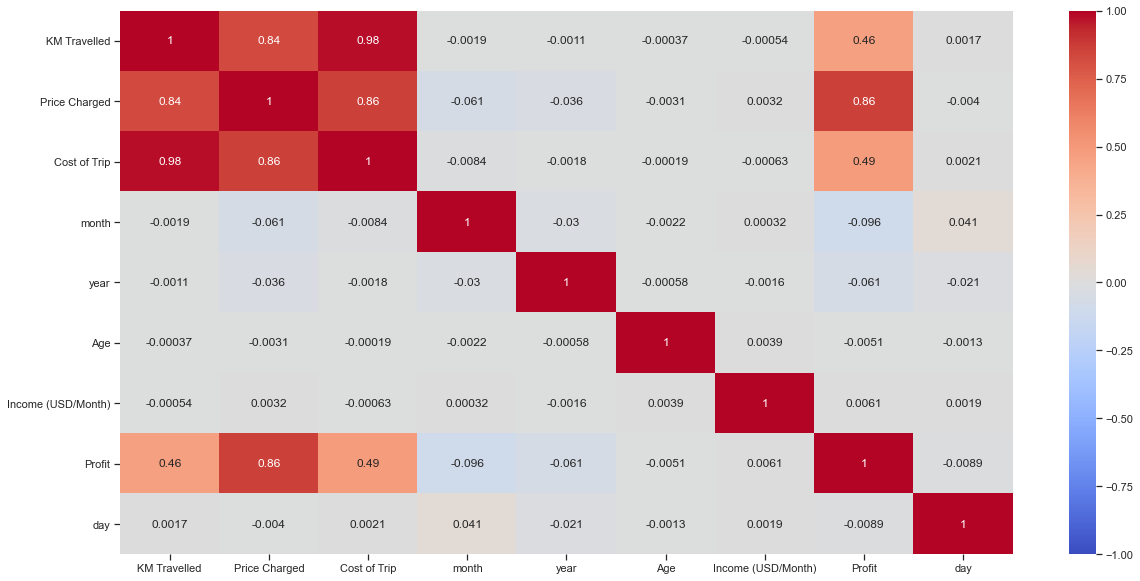

In [12]:
df = data_model[['KM Travelled','Price Charged','Cost of Trip','month','year','Age','Income (USD/Month)','Profit','day']]
df.corr()
plt.figure(figsize=(20,10))
seaborn.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

<AxesSubplot:xlabel='KM Travelled', ylabel='Price Charged'>

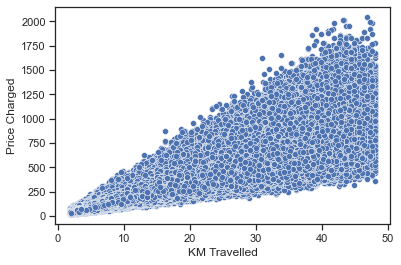

In [13]:
seaborn.scatterplot(data=data_model, x="KM Travelled", y="Price Charged")

<AxesSubplot:xlabel='KM Travelled', ylabel='Cost of Trip'>

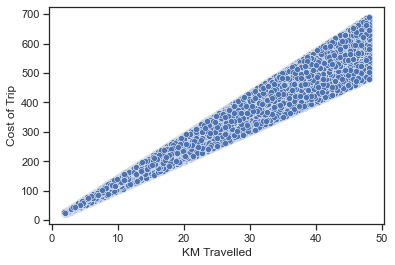

In [14]:
seaborn.scatterplot(data=data_model, x="KM Travelled", y="Cost of Trip")

<AxesSubplot:xlabel='KM Travelled', ylabel='Profit'>

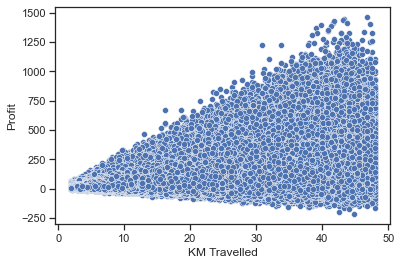

In [15]:
seaborn.scatterplot(data=data_model, x="KM Travelled", y="Profit")

In [16]:
data_model.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,year,month,day
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",57.3150,2016,1,8
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701",281.2772,2018,7,21
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701",194.6480,2018,11,23
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",23.6660,2016,1,6
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701",253.9808,2018,4,21


In [17]:
dummy_company=pd.get_dummies(data_model['Company'],prefix='Company')
#dummy_city=pd.get_dummies(data_model['City'],prefix='City')
dummy_payment=pd.get_dummies(data_model['Payment_Mode'],prefix='Payment')
dummy_gender=pd.get_dummies(data_model['Gender'],prefix='Gender')

In [18]:
data_model_f=data_model.join(dummy_company)
#data_model_f = data_model_f.join(dummy_city)
data_model_f = data_model_f.join(dummy_payment)
data_model_f = data_model_f.join(dummy_gender)
data_model_f.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,...,Profit,year,month,day,Company_Pink Cab,Company_Yellow Cab,Payment_Card,Payment_Cash,Gender_Female,Gender_Male
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,...,57.3150,2016,1,8,1,0,1,0,0,1
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,...,281.2772,2018,7,21,0,1,0,1,0,1
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,...,194.6480,2018,11,23,0,1,1,0,0,1
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,...,23.6660,2016,1,6,1,0,1,0,0,1
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,...,253.9808,2018,4,21,0,1,1,0,0,1


In [19]:
data_model_f['City'] = data_model_f['City'].astype("category")
data_model_f['City'] = data_model_f['City'].cat.codes

In [20]:
data_model_sk = data_model_f[[
 'KM Travelled',
 'Price Charged',
 'Cost of Trip',
 'Age',
 'Income (USD/Month)',
 'Population',
 'Users',
 'Profit',
 'year',
 'month',
 'day',
 'Company_Pink Cab',
 'City',
 'Payment_Card',
 'Gender_Female']]

<AxesSubplot:>

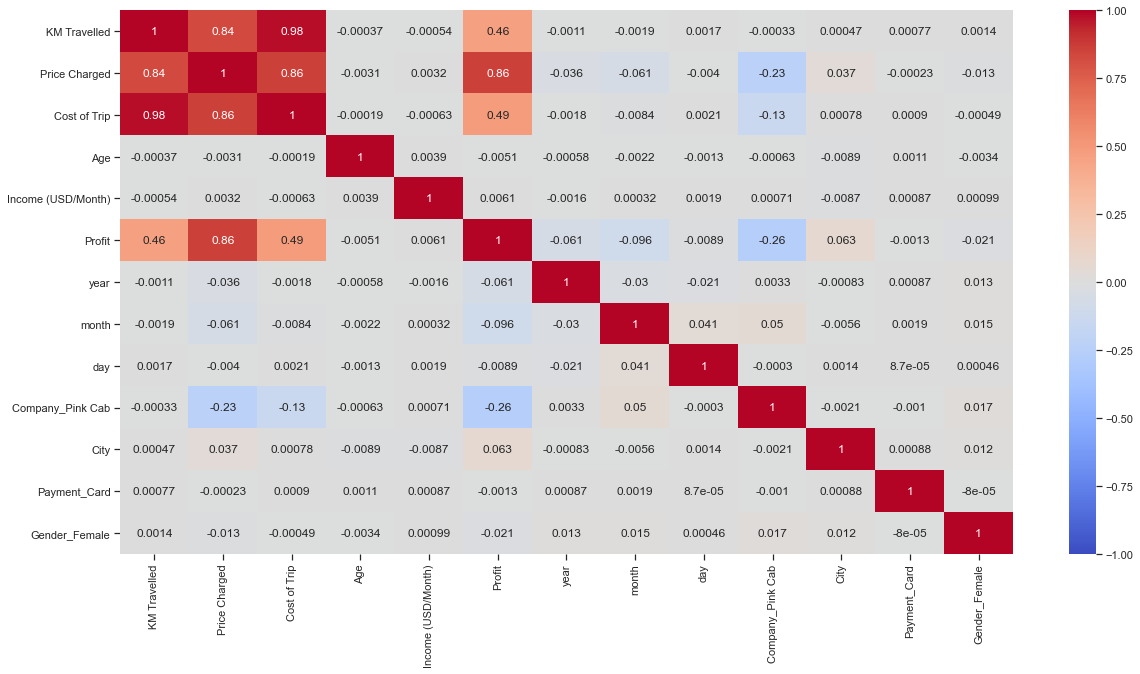

In [21]:
plt.figure(figsize=(20,10))
seaborn.heatmap(data_model_sk.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

In [22]:
from sklearn.model_selection import train_test_split as TTS
train,test=TTS(data_model_sk,test_size=0.20,random_state=0)
train.columns.values.tolist()

['KM Travelled',
 'Price Charged',
 'Cost of Trip',
 'Age',
 'Income (USD/Month)',
 'Population',
 'Users',
 'Profit',
 'year',
 'month',
 'day',
 'Company_Pink Cab',
 'City',
 'Payment_Card',
 'Gender_Female']

In [23]:
train_x = train[['KM Travelled',  'Age', 'Income (USD/Month)', 'year', 'month', 'day', 'Company_Pink Cab',
                 'City', 'Payment_Card', 'Gender_Female']]
train_y = train['Price Charged']
test_x = test[['KM Travelled',  'Age', 'Income (USD/Month)', 'year', 'month', 'day', 'Company_Pink Cab',
                 'City', 'Payment_Card', 'Gender_Female']]
test_y = test['Price Charged']

In [24]:
from sklearn.ensemble import RandomForestRegressor as RF
logit=RF(n_jobs=2,n_estimators=50, max_depth=15, min_samples_split=12)
logit.fit(train_x,train_y)

RandomForestRegressor(max_depth=15, min_samples_split=12, n_estimators=50,
                      n_jobs=2)

In [25]:
logit.score(train_x,train_y)

0.957084878080038

In [26]:
logit.score(test_x,test_y)

0.9384947067682017

In [29]:
columna_prueba = train_x.columns.values.tolist()

In [30]:
logit.feature_importances_

array([7.37537007e-01, 3.20597961e-03, 4.43416482e-03, 4.20922313e-03,
       2.32130792e-02, 7.06520052e-03, 6.91537354e-02, 1.50504053e-01,
       3.32878818e-04, 3.44678035e-04])

In [31]:
import matplotlib.pyplot as plt
import numpy

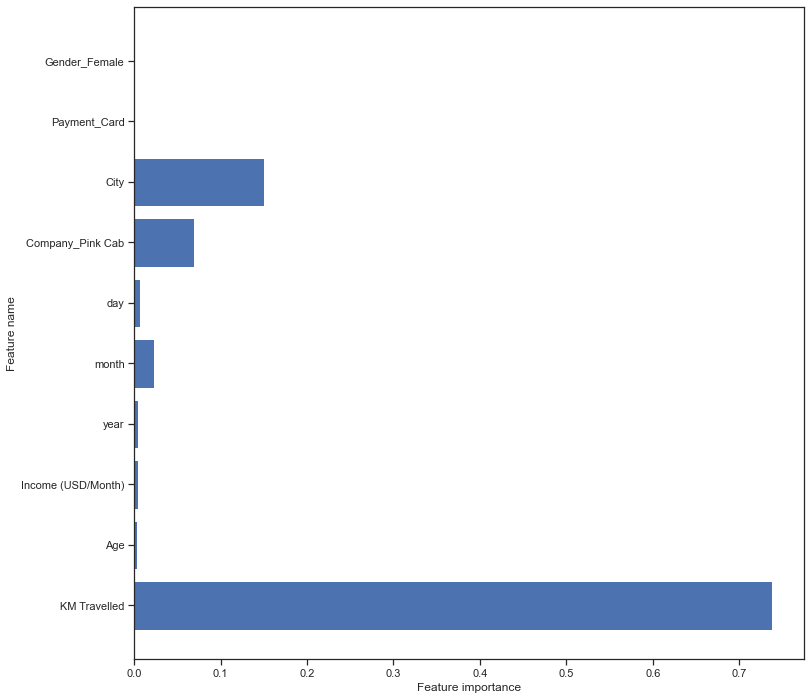

In [32]:
c_features = len(columna_prueba)
fig, ax = plt.subplots(figsize=(12, 12))
plt.barh(range(c_features), logit.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(numpy.arange(c_features), columna_prueba)
plt.show()